# Zomato Data Analysis Project

# Step 1 Importing Libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2 creating data frame

In [3]:
dataframe = pd.read_csv("Zomato data .csv")

In [8]:
print(dataframe)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

# convert the datatype of column-rate

In [7]:
def handlerate(value):
    value  = str(value).split('/')
    value  = value[0]
    return float(value)

dataframe['rate'] = dataframe['rate'].apply(handlerate)

In [11]:
dataframe.info

<bound method DataFrame.info of                       name online_order book_table  rate  votes  \
0                    Jalsa          Yes        Yes   4.1    775   
1           Spice Elephant          Yes         No   4.1    787   
2          San Churro Cafe          Yes         No   3.8    918   
3    Addhuri Udupi Bhojana           No         No   3.7     88   
4            Grand Village           No         No   3.8    166   
..                     ...          ...        ...   ...    ...   
143       Melting Melodies           No         No   3.3      0   
144        New Indraprasta           No         No   3.3      0   
145           Anna Kuteera          Yes         No   4.0    771   
146                 Darbar           No         No   3.0     98   
147          Vijayalakshmi          Yes         No   3.9     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2         

# Type of  resturant

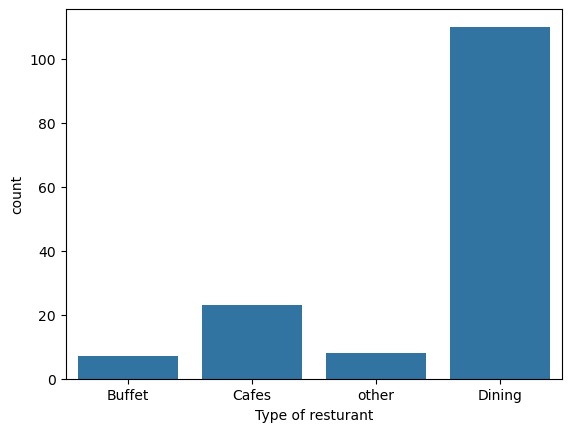

In [12]:
sns.countplot(x = dataframe['listed_in(type)'])
plt.xlabel('Type of resturant')
plt.show()

# conclusion - majority of the resturant falls in dinning category.

# highest voting 

Text(0, 0.5, 'Votes')

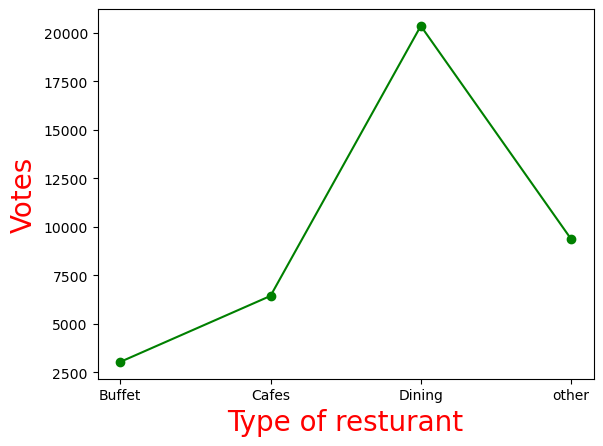

In [4]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame ({'votes':grouped_data})
plt.plot(result,c = 'green', marker = 'o')
plt.xlabel('Type of resturant', c = 'red', size = 20)
plt.ylabel('Votes', c= 'red',size  = 20)

# conclusion - dinnning resturant has recieved maximum votes

# Q3. what are the rating majority of resturant have recieved?

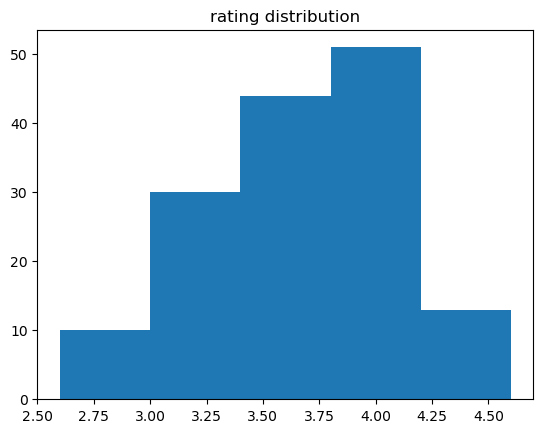

In [10]:
plt.hist(dataframe['rate'], bins = 5)
plt.title('rating distribution')
plt.show()

# conclusion - the majority resturant recieved rating from 3.5 to 4

# Q4. Zomato has observed that most couples order most of their food online. what is their average spending on each other

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

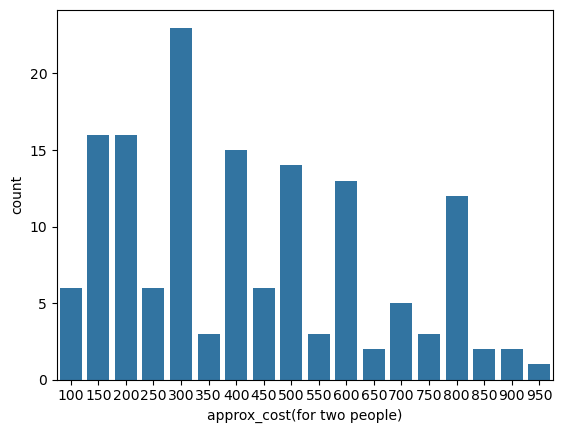

In [13]:
couple_data = dataframe['approx_cost(for two people)']
sns.countplot(x = couple_data)

# conclusion - the majority of couples prefer  with an approximate cost of 300 Rupees.

# Q.5 which mode(online/offline) have received the maximum rating

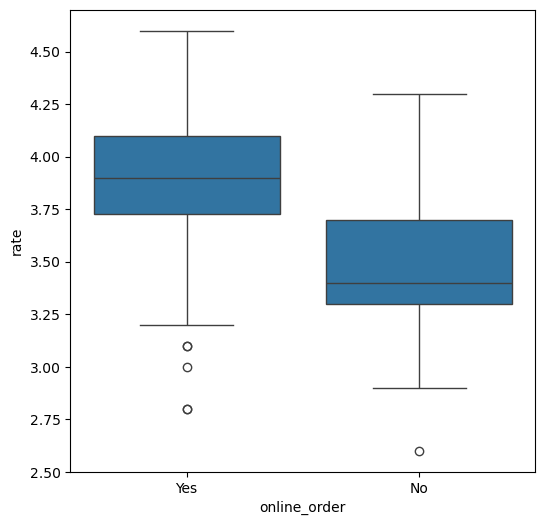

In [15]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = dataframe)
plt.show()

# Conclusion - offline order recieved lower rating in comparison to online order

# Q.3  which type of resturant recieved more offline order

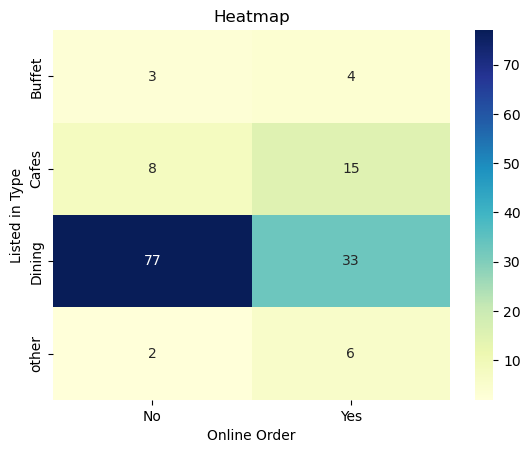

In [20]:
pivot_table = dataframe.pivot_table(index = 'listed_in(type)', columns = 'online_order', aggfunc ='size',fill_value = 0 )
sns.heatmap(pivot_table, annot = True, cmap ='YlGnBu' ,fmt = 'd')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed in Type')
plt.show()

# Conclusion- Dinning resturant primarily accept offline orders, where as cafe resturant primarily accept online ordres this suggest that client prefer order in person at resturant but prefer online odering at cafes. 